# Control Examples

In [15]:
from control.matlab import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
%matplotlib inline

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

In [16]:
# define P as a transfer function
P = tf([0, 4],[1,2,3])
P

TransferFunction(array([4]), array([1, 2, 3]))

In [17]:
# Second approach
s = tf('s')
P = 4/(s**2 + 2*s + 3)
P

TransferFunction(array([4]), array([1, 2, 3]))

In [34]:
# third approach
A = [[0, 1],[-3, -2]]
B = [[0],[1]]
C = [[4, 0],[0, 1]]
D = [[0],[0]]
Pss = ss(A,B,C,D)
Pss

StateSpace(array([[ 0.,  1.],
       [-3., -2.]]), array([[0.],
       [1.]]), array([[4., 0.],
       [0., 1.]]), array([[0.],
       [0.]]))

In [48]:
P = ss2tf(A,B,C[0][:],D[0][:]) # to be consistent with the above
for ii in range(len(P.num[0][0][:])):
    if P.num[0][0][ii] < 1e-12:
        P.num[0][0][ii] = 0
    else:
        P.num[0][0][ii] = P.num[0][0][ii]
P

TransferFunction(array([0., 4.]), array([1., 2., 3.]))

## Try some plotting 

In [49]:
t = np.arange(0,10,0.01)
y,t = impulse(Pss,t)

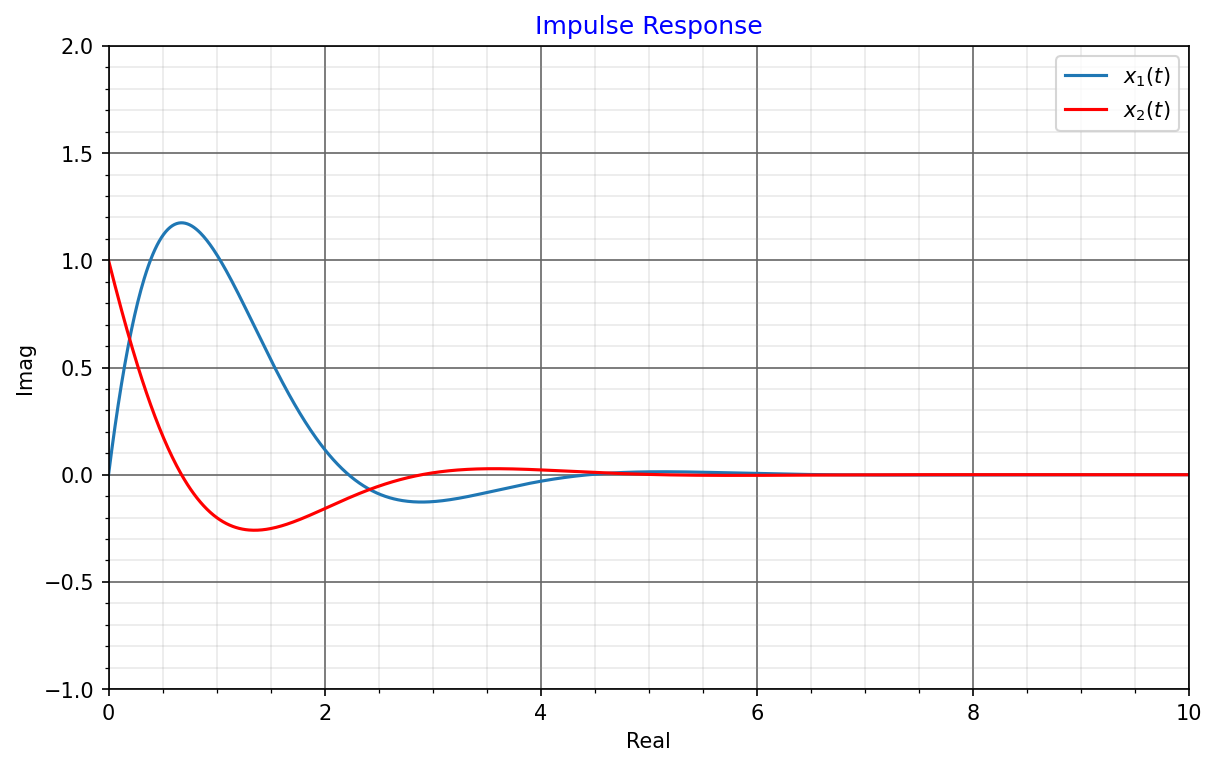

In [50]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Impulse Response')
plt.show()

In [52]:
t = np.arange(0,10,0.01)
y,t = step(Pss,t)

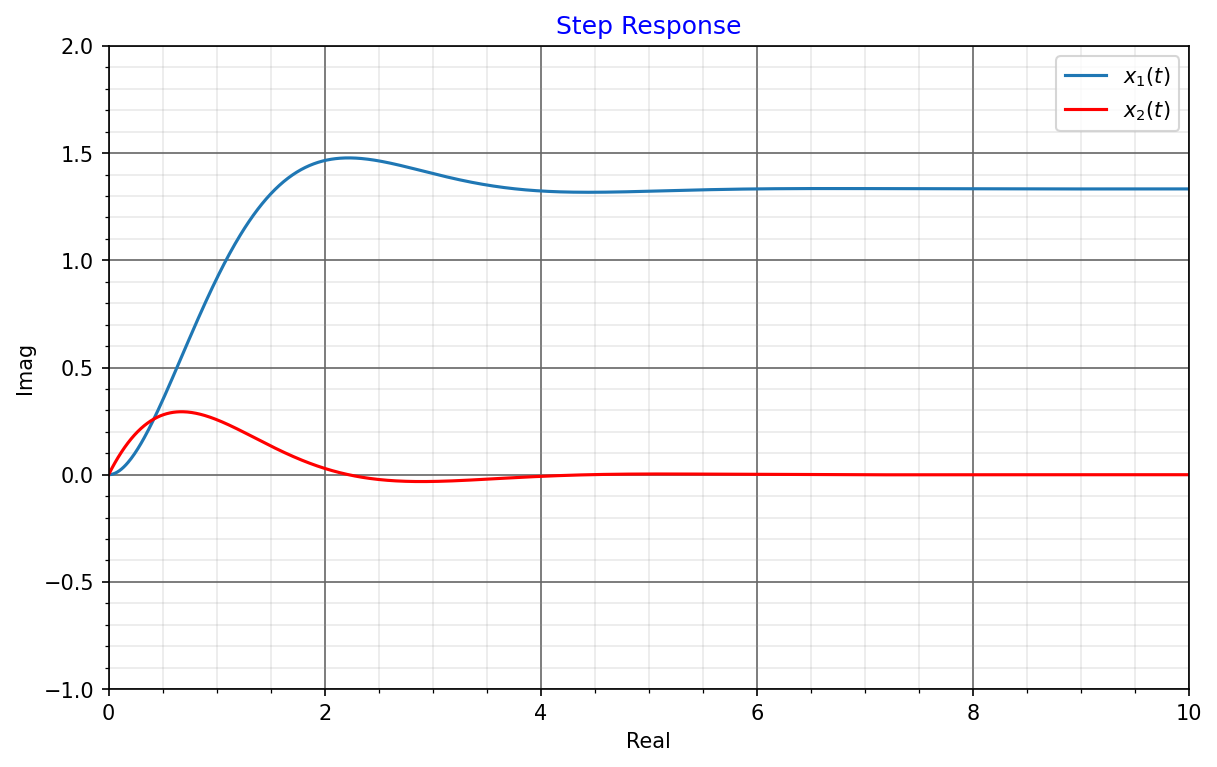

In [57]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-1,2)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Step Response')
plt.show()

In [58]:
X0 = [0, -1]
y,t = initial(Pss,t,X0)

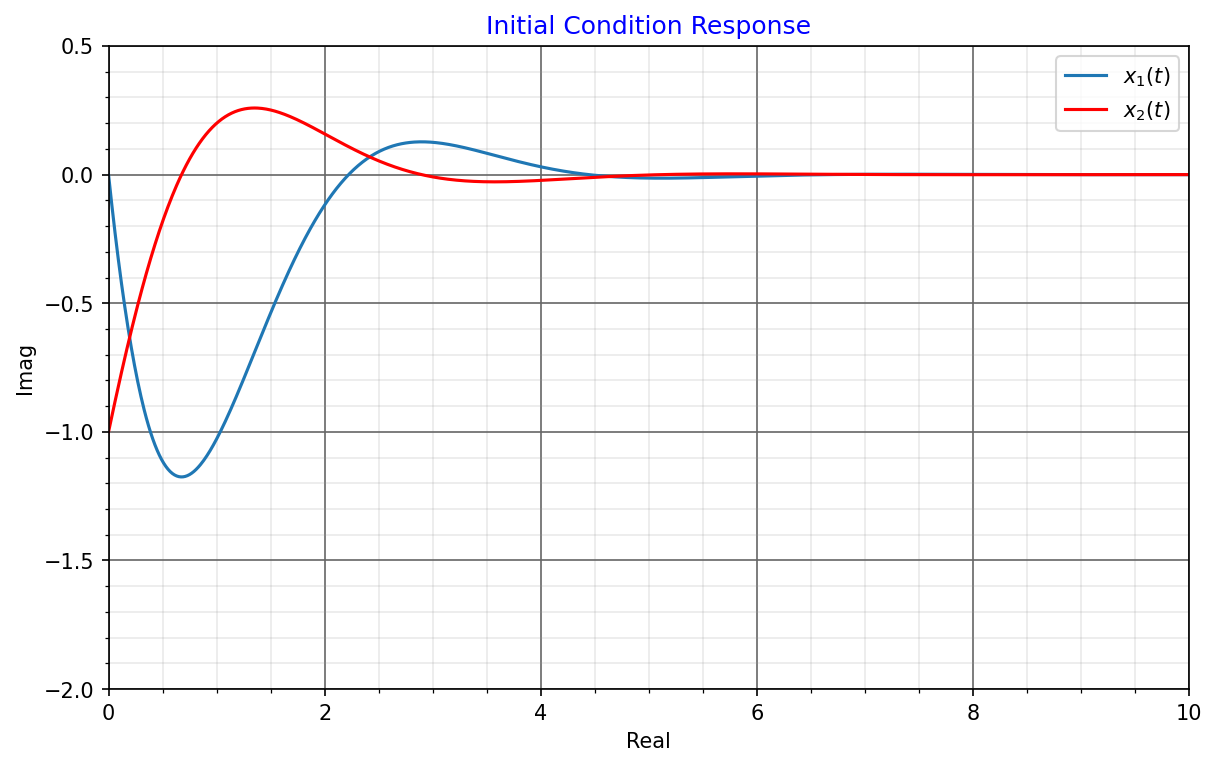

In [60]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()

In [61]:
U = np.sin(5*2*np.pi*t)
y,t,xout = lsim(Pss,U,t,X0)

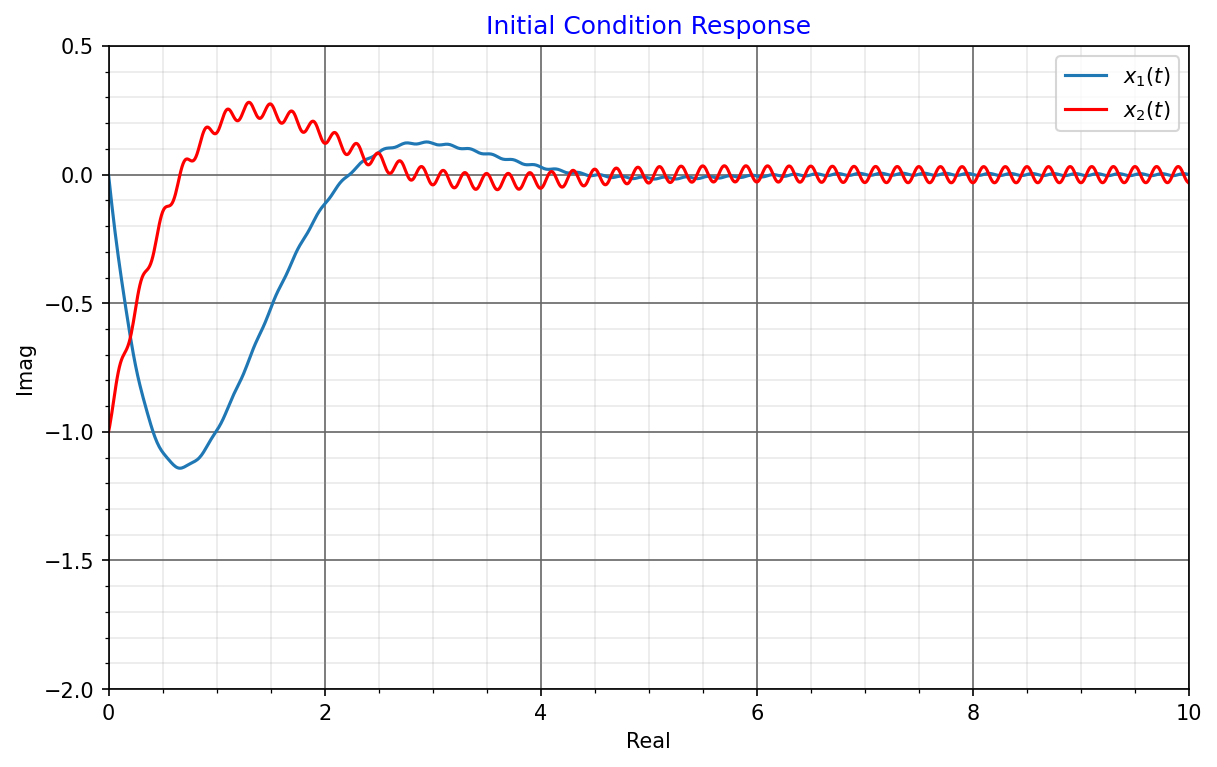

In [63]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(t,y[:,0],label='$x_1(t)$')
plt.plot(t,y[:,1],'r',label='$x_2(t)$')

nicegrid()
plt.legend()
plt.xlim(0,10)
plt.ylim(-2,0.5)
plt.xlabel('Real')
plt.ylabel('Imag')
plt.title('Initial Condition Response')
plt.show()

(0.01, 100)

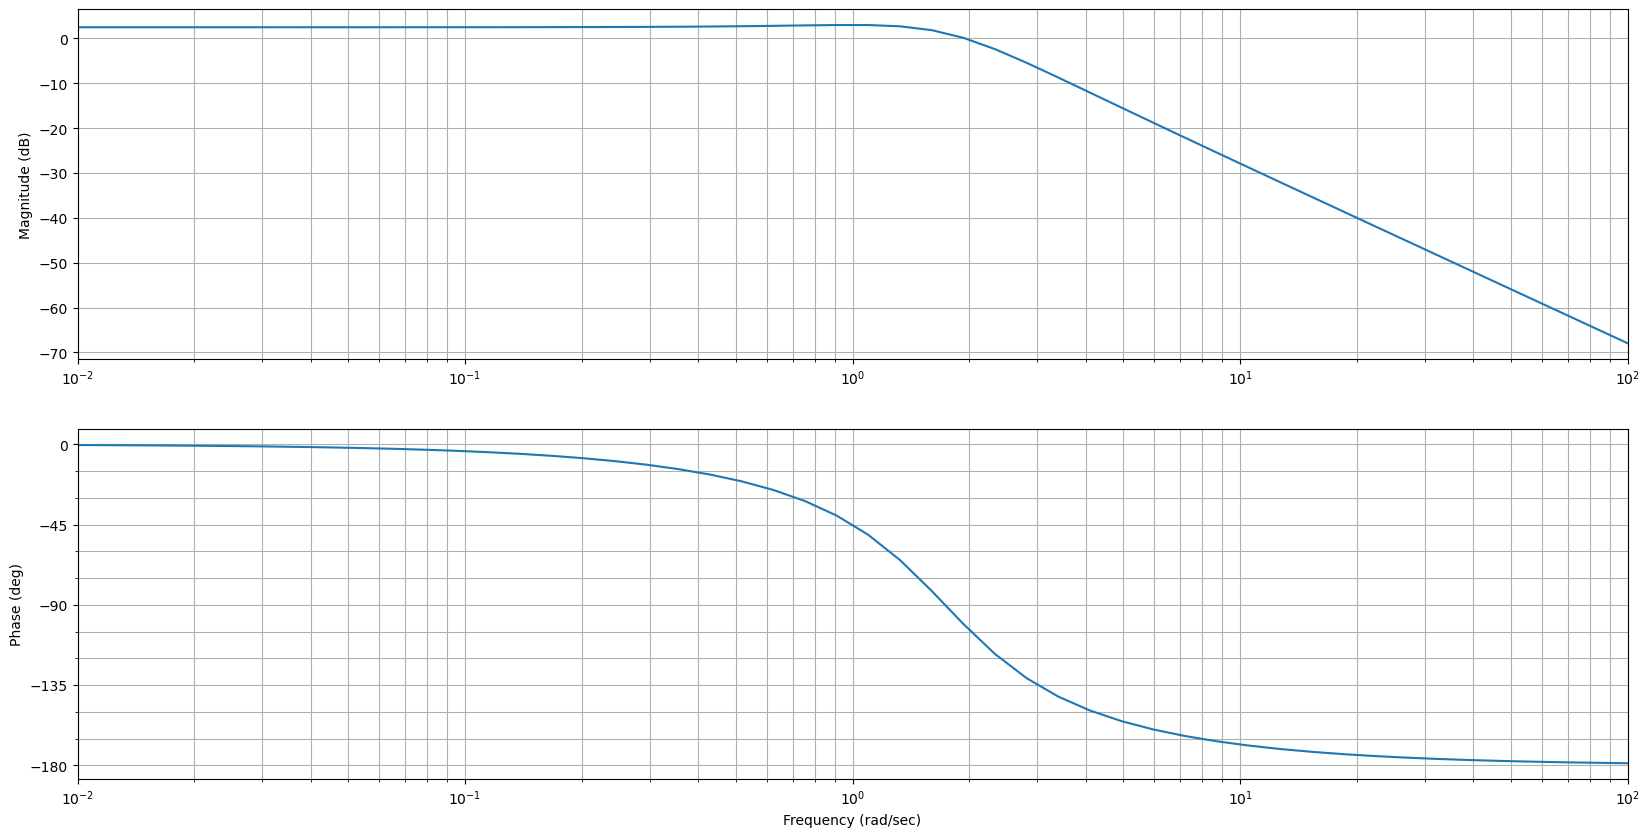

In [64]:
s = tf('s')
P = 4/(s**2 + 2*s + 3)
gain, phase, w = bode(P, logspace(-2,2))
plt.xlim(.01,100)

In [65]:
P.pole()

array([-1.+1.41421356j, -1.-1.41421356j])

In [66]:
P.zero()

array([], dtype=float64)

In [67]:
GM, PM, wpc, wgc = margin(P)
print(f'GM = {20*np.log10(GM):2f}')
print(f'PM = {PM:2f}')
print(f'wpc = {wpc:2f}')
print(f'wgc = {wgc:2f}')

GM = inf
PM = 78.047144
wpc = nan
wgc = 1.956637
